In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from numba import njit

In [4]:
sim_list = ['fRpoly-Rcore1.0-DesNumNgbEnrichment512-ftrap', 'fRpoly-Rcore1.0-DesNumNgbEnrichment512-RadFeed',
            'fR3.0-Rcore1.0-DesNumNgbEnrichment512-RadFeed', 'phantom-vacuum-Sg20-Rc3.5-RadFeed']

def read_snap(idx, sim_idx, lvl='lvl3', parttype=[0], fields=['Coordinates', 'Masses', 'Velocities'],
              basepath = '/n/holyscratch01/hernquist_lab/abeane/starbar_runs/runs/'):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output'
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True)

def read_sfr(sim_idx, lvl='lvl3', basepath = '/n/holyscratch01/hernquist_lab/abeane/starbar_runs/runs/'):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output/sfr.txt'
    return np.genfromtxt(fname)

In [5]:
sfr_0 = read_sfr(0, lvl='lvl3-ft0')
sfr_2 = read_sfr(0, lvl='lvl3-ft2')
sfr_8 = read_sfr(0, lvl='lvl3-ft8')
sfr_RF = read_sfr(1, lvl='lvl3')

In [7]:
@njit
def _binned_average(x, y, bins):
    N = len(bins)
    
    sum_x_in_bin = np.zeros(N-1)
    sum_y_in_bin = np.zeros(N-1)
    N_in_bin = np.zeros(N-1)
    
    for i in range(len(x)):
        this_x = x[i]
        for j in range(N-1):
            if this_x > bins[j] and this_x < bins[j+1]:
                sum_x_in_bin[j] += x[i]
                sum_y_in_bin[j] += y[i]
                N_in_bin[j] += 1
    
    for j in range(N-1):
        sum_x_in_bin[j] /= N_in_bin[j]
        sum_y_in_bin[j] /= N_in_bin[j]
    
    return sum_x_in_bin, sum_y_in_bin
    
def binned_average(x, y, dx):
    xmin = np.min(x)
    xmax = np.max(x)

    bins = np.arange(xmin, xmax+dx, dx)
    return _binned_average(x, y, bins)

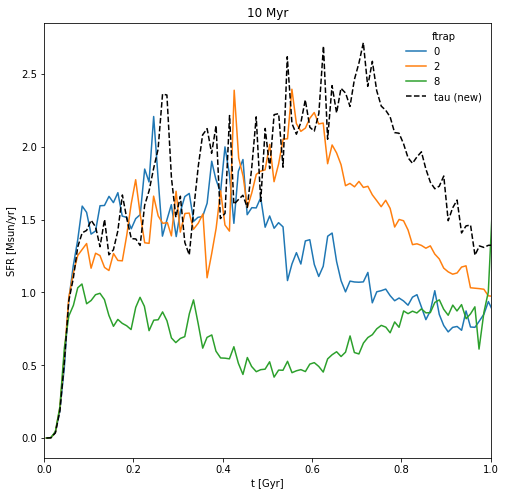

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dt = 0.01

t, SFR = binned_average(sfr_0[:,0], sfr_0[:,2], dt)
ax.plot(t, SFR, label='0')

t, SFR = binned_average(sfr_2[:,0], sfr_2[:,2], dt)
ax.plot(t, SFR, label='2')

t, SFR = binned_average(sfr_8[:,0], sfr_8[:,2], dt)
ax.plot(t, SFR, label='8')

t, SFR = binned_average(sfr_RF[:,0], sfr_RF[:,2], dt)
ax.plot(t, SFR, label='tau (new)', c='k', ls='dashed')

ax.legend(frameon=False, title='ftrap')
ax.set(xlabel='t [Gyr]', ylabel='SFR [Msun/yr]')
ax.set_xlim(0, 1)
ax.set_title('10 Myr')
plt.show()

In [3]:
sfr = read_sfr(2, lvl='lvl3')
sfr_eta1 = read_sfr(2, lvl='lvl3-eta1')
sfr_eta2 = read_sfr(2, lvl='lvl3-eta2')
sfr_eta12 = read_sfr(2, lvl='lvl3-eta1-eta2')
sfr_eta12OB = read_sfr(2, lvl='lvl3-eta1-eta2-OBbugfix')

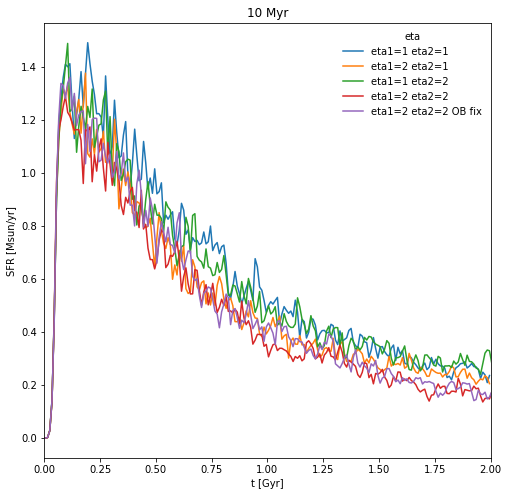

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dt = 0.01

t, SFR = binned_average(sfr[:,0], sfr[:,2], dt)
ax.plot(t, SFR, label='eta1=1 eta2=1')

t, SFR = binned_average(sfr_eta1[:,0], sfr_eta1[:,2], dt)
ax.plot(t, SFR, label='eta1=2 eta2=1')

t, SFR = binned_average(sfr_eta2[:,0], sfr_eta2[:,2], dt)
ax.plot(t, SFR, label='eta1=1 eta2=2')

t, SFR = binned_average(sfr_eta12[:,0], sfr_eta12[:,2], dt)
ax.plot(t, SFR, label='eta1=2 eta2=2')

t, SFR = binned_average(sfr_eta12OB[:,0], sfr_eta12OB[:,2], dt)
ax.plot(t, SFR, label='eta1=2 eta2=2 OB fix')

ax.legend(frameon=False, title='eta')
ax.set(xlabel='t [Gyr]', ylabel='SFR [Msun/yr]')
ax.set_xlim(0, 2)
ax.set_title('10 Myr')
plt.show()

In [5]:
sfr3 = read_sfr(3, lvl='lvl3')
sfr3_eta1 = read_sfr(3, lvl='lvl3-eta1')
sfr3_eta2 = read_sfr(3, lvl='lvl3-eta2')
sfr3_eta12 = read_sfr(3, lvl='lvl3-eta1-eta2')
sfr3_eta12OB = read_sfr(3, lvl='lvl3-eta1-eta2-OBbugfix')

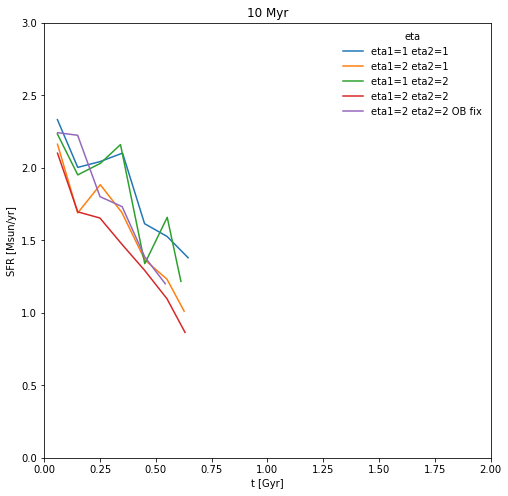

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dt = 0.1

t, SFR = binned_average(sfr3[:,0], sfr3[:,2], dt)
ax.plot(t, SFR, label='eta1=1 eta2=1')

t, SFR = binned_average(sfr3_eta1[:,0], sfr3_eta1[:,2], dt)
ax.plot(t, SFR, label='eta1=2 eta2=1')

t, SFR = binned_average(sfr3_eta2[:,0], sfr3_eta2[:,2], dt)
ax.plot(t, SFR, label='eta1=1 eta2=2')

t, SFR = binned_average(sfr3_eta12[:,0], sfr3_eta12[:,2], dt)
ax.plot(t, SFR, label='eta1=2 eta2=2')

t, SFR = binned_average(sfr3_eta12OB[:,0], sfr3_eta12OB[:,2], dt)
ax.plot(t, SFR, label='eta1=2 eta2=2 OB fix')

ax.legend(frameon=False, title='eta')
ax.set(xlabel='t [Gyr]', ylabel='SFR [Msun/yr]')
ax.set_xlim(0, 2)
ax.set_ylim(0, 3)
ax.set_title('10 Myr')
plt.show()

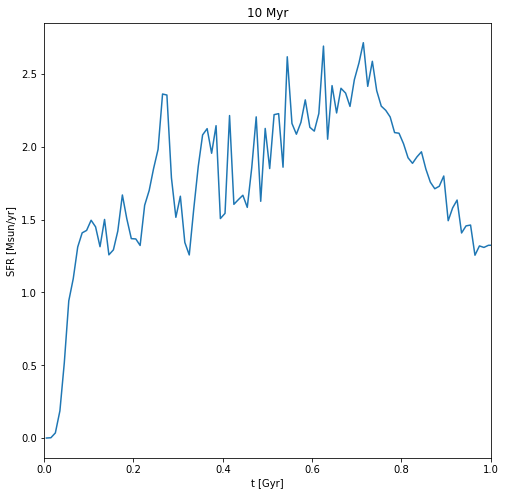

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dt = 0.01

t, SFR = binned_average(sfr_RF[:,0], sfr_RF[:,2], dt)
ax.plot(t, SFR, label='0')

# ax.legend(frameon=False, title='ftrap')
ax.set(xlabel='t [Gyr]', ylabel='SFR [Msun/yr]')
ax.set_xlim(0, 1)
ax.set_title('10 Myr')
plt.show()

In [6]:
sn0 = read_snap(100, 0, lvl='lvl3-ft0', parttype=[0, 4], fields=None)
sn2 = read_snap(100, 0, lvl='lvl3-ft2', parttype=[0, 4], fields=None)
sn8 = read_snap(100, 0, lvl='lvl3-ft8', parttype=[0, 4], fields=None)

In [7]:
for sn in [sn0, sn2, sn8]:
    print(np.sum(sn.part4.Cum_RadMomentumRealInjected)/sn.NumPart_Total[4])

0.0008026859410397199
0.0028879396162715914
0.006400197992759289


In [19]:
0.00616/0.00218

2.8256880733944953